In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [2]:
# Step 1: Register and obtain API key from OpenWeatherMap
api_key = "fb365aa6104829b44455572365ff3b4e"

In [3]:
# Step 2: Interact with the OpenWeatherMap API
base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "New York"
params = {
    "q": city_name,
    "appid": api_key,
    "units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

In [4]:
response

<Response [200]>

In [5]:
# Extract relevant weather attributes and timestamps
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

In [6]:
weather_data

[{'dt': 1699110000,
  'main': {'temp': 9.42,
   'feels_like': 7.65,
   'temp_min': 9.42,
   'temp_max': 11.63,
   'pressure': 1025,
   'sea_level': 1025,
   'grnd_level': 1024,
   'humidity': 61,
   'temp_kf': -2.21},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'clouds': {'all': 33},
  'wind': {'speed': 3.28, 'deg': 244, 'gust': 4.99},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2023-11-04 15:00:00'},
 {'dt': 1699120800,
  'main': {'temp': 12.4,
   'feels_like': 10.9,
   'temp_min': 12.4,
   'temp_max': 14.44,
   'pressure': 1023,
   'sea_level': 1023,
   'grnd_level': 1022,
   'humidity': 46,
   'temp_kf': -2.04},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'clouds': {'all': 67},
  'wind': {'speed': 2.78, 'deg': 243, 'gust': 3.88},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2023-11-04 18:00:00'},
 {'dt':

In [7]:
# Convert timestamps to pandas datetime objects
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [8]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    "Datetime": datetime_objects,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})


In [9]:
# Convert the "Datetime" column to a DatetimeIndex
weather_df.set_index("Datetime", inplace=True)

In [10]:
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2023-11-04 15:00:00,1699110000,9.42,61,3.28,scattered clouds
2023-11-04 18:00:00,1699120800,12.40,46,2.78,broken clouds
2023-11-04 21:00:00,1699131600,14.67,37,2.82,overcast clouds
2023-11-05 00:00:00,1699142400,12.78,46,2.53,overcast clouds
2023-11-05 03:00:00,1699153200,11.76,50,2.42,overcast clouds
2023-11-05 06:00:00,1699164000,11.26,51,1.18,overcast clouds
2023-11-05 09:00:00,1699174800,11.10,53,1.15,overcast clouds
2023-11-05 12:00:00,1699185600,10.75,55,1.34,overcast clouds
2023-11-05 15:00:00,1699196400,13.89,43,1.53,broken clouds


In [11]:
# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
    rain = entry.get("rain", {}).get("3h", 0)
    snow = entry.get("snow", {}).get("3h", 0)
    total_precipitation = rain + snow
    precipitation.append(total_precipitation)


In [12]:
precipitation

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.24,
 4.12,
 0.29,
 0.21]

In [13]:

# Step 5: Perform data modeling
avg_temp = sum(temperatures) / len(temperatures)
avg_temp

12.340499999999999

In [14]:
max_temp = max(temperatures)
max_temp

19.16

In [15]:
min_temp = min(temperatures)
min_temp

7.39

In [16]:
import matplotlib.pyplot as plt

daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()


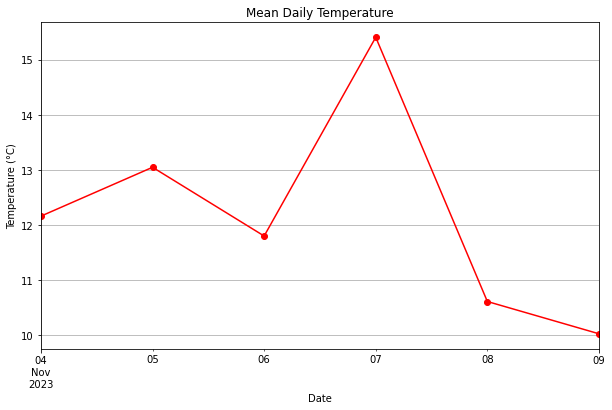

In [17]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()



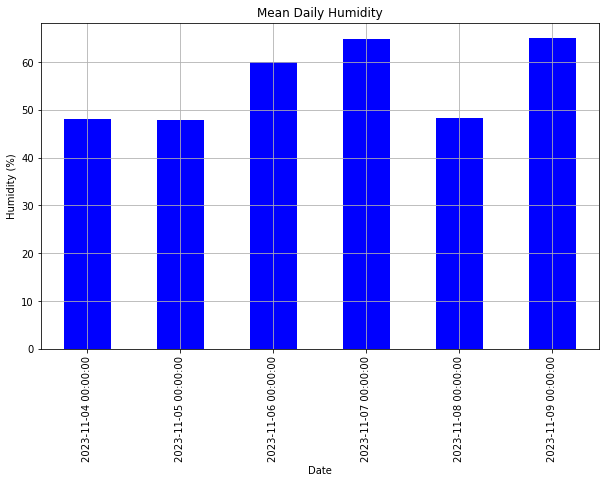

In [18]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()



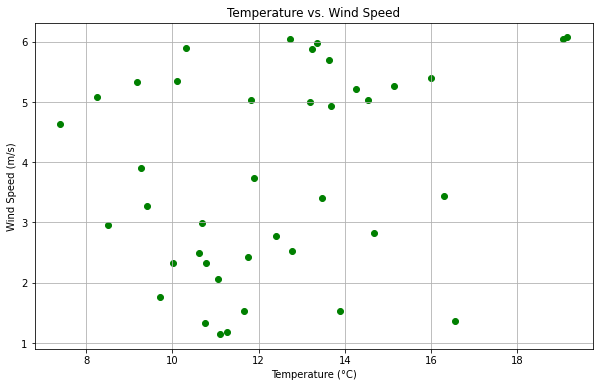

In [19]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

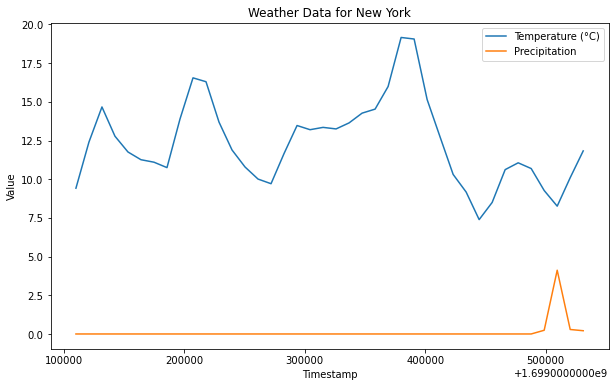

In [20]:
# Step 6: Visualize the weather data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()


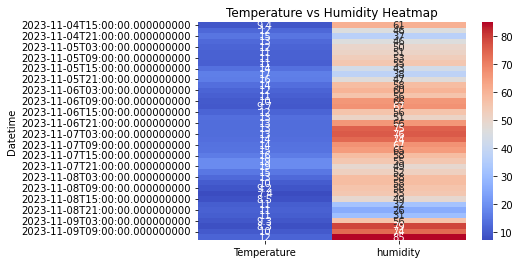

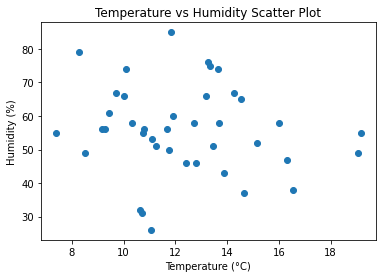

In [21]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

# Create a scatter plot to visualize the relationship between temperature and humidity
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [22]:
# Assuming weather_data is a list of weather data entries
# Accessing the attributes of the first entry

import pandas as pd

# Specify the locations for which you want to retrieve weather data
locations = ['London', 'Paris', 'New York']

# Create an empty DataFrame to store weather data
weather_df = pd.DataFrame()

# Retrieve weather data for each location
for location in locations:
    # Construct the API URL
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'
    
    # Make the API request
    response = requests.get(api_url)
    data = response.json()
    
    # Extract relevant weather attributes
    temperature = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    
    # Check if 'coord' key is present before accessing it
    latitude = data.get('coord', {}).get('lat', None)
    longitude = data.get('coord', {}).get('lon', None)
    
    # Create a DataFrame for the current location's weather data
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
    
    # Append the current location's weather data to the main DataFrame
    weather_df = weather_df.append(location_df, ignore_index=True)




In [23]:
weather_df

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,London,285.79,85,5.66,51.5085,-0.1257
1,Paris,287.42,71,8.75,48.8534,2.3488
2,New York,281.71,71,3.09,40.7143,-74.0060


In [24]:
# Step 8: Incorporate geographical information
# (Geospatial visualization requires additional libraries like Folium)
# Extract latitude and longitude from the current weather data
latitude = data.get("coord", {}).get("lat", 0)
longitude = data.get("coord", {}).get("lon", 0)

# Create a Folium map centered around the city
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers for each location in the DataFrame
for index, row in weather_df.iterrows():
    location_name = row['Location']
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    # Create a marker and add it to the map
    folium.Marker([latitude, longitude], popup=location_name).add_to(weather_map)




In [25]:
weather_map

In [26]:
# Add a marker for the city's location
folium.Marker([latitude, longitude], popup=city_name).add_to(weather_map)

# Display the map
weather_map.save("weather_map.html")